# Image Filters

In this notebook you can use interactive sliders to apply filters with different paremeters to a test image.

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

In [118]:
def load_image(path):
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

paths = ["./examples/signs_vehicles_xygrad.png",
        "./examples/test6.jpg",
        "./examples/test4.jpg"]

images = []
for path in paths:
    images.append(load_image(path))

In [1]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == "x":
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    else: 
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    return binary_output

In [2]:
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    # 3) Calculate the magnitude 
    magnitude = np.sqrt(np.square(sobelx) + np.square(sobely))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # Rescale to 8 bit
    scale_factor = np.max(magnitude)/255 
    magnitude = (magnitude/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(magnitude)
    binary_output[(magnitude >= mag_thresh[0]) & (magnitude <= mag_thresh[1])] = 1
    # Return the binary image
    return binary_output

In [5]:
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

In [86]:
def hls_select(img, channel = 0, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,channel]
    # 2) Apply a threshold to the S channel
    binary_output =  np.zeros_like(s_channel)
    # 3) Return a binary image of threshold result
    binary_output[(s_channel > thresh[0]) & (s_channel < thresh[1])] = 1
    return binary_output

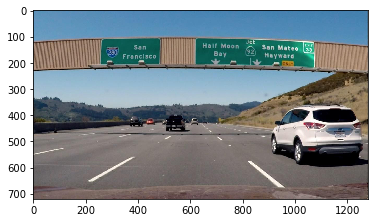

In [116]:
plt.imshow(images[0])

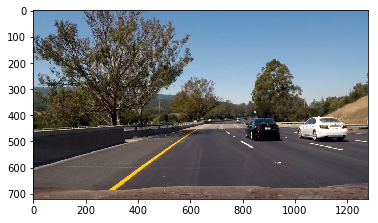

In [117]:
plt.imshow(images[1])

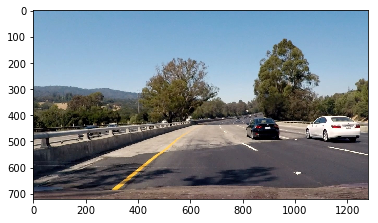

In [119]:
plt.imshow(images[2])

In [105]:
def show_abs_sobel(image_nr, orient, sobel_kernel, minthresh, maxthresh):
    plt.imshow(abs_sobel_thresh(images[image_nr], orient = orient, sobel_kernel=sobel_kernel,
                                thresh= (minthresh, maxthresh)), cmap="gray")

In [106]:
def show_mag_sobel(image_nr, sobel_kernel, minthresh, maxthresh):
    plt.imshow(mag_thresh(images[image_nr], sobel_kernel=sobel_kernel, mag_thresh=(minthresh, maxthresh)), cmap="gray")

In [107]:
def show_dir_sobel(image_nr, sobel_kernel, minthresh, maxthresh):
    plt.imshow(dir_threshold(images[image_nr], sobel_kernel=sobel_kernel, thresh=(minthresh, maxthresh)), cmap="gray")

In [108]:
def show_hls_select(image_nr, channel, minthresh, maxthresh):
    plt.imshow(hls_select(images[image_nr], channel=channel, thresh=(minthresh, maxthresh)), cmap="gray")

In [135]:
images_selections = [0, len(images) - 1]

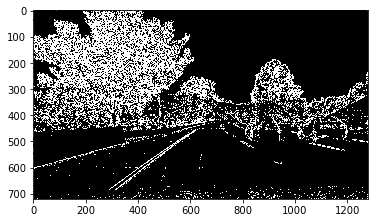

In [136]:
interact(show_abs_sobel, 
         image_nr = images_selections,
         orient = ["x", "y"],
         sobel_kernel=widgets.IntSlider(min=0,max=20,step=1,value=3),
         minthresh=widgets.IntSlider(min=0,max=255,step=1,value=10),
         maxthresh=widgets.IntSlider(min=0,max=255,step=1,value=100));


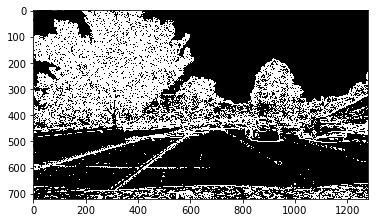

In [137]:
interact(show_mag_sobel, 
         image_nr = images_selections,
         sobel_kernel=widgets.IntSlider(min=0,max=20,step=1,value=3),
         minthresh=widgets.IntSlider(min=0,max=255,step=1,value=10),
         maxthresh=widgets.IntSlider(min=0,max=255,step=1,value=100));


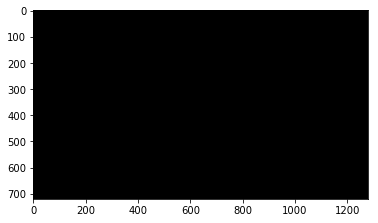

In [138]:
interact(show_dir_sobel, 
         image_nr = images_selections,
         sobel_kernel=widgets.IntSlider(min=1,max=31,step=2,value=3),
         minthresh=widgets.FloatSlider(min=0.0,max=2*np.pi,step=0.01,value=1.0),
         maxthresh=widgets.FloatSlider(min=0.0,max=2*np.pi,step=0.01,value=1.0));


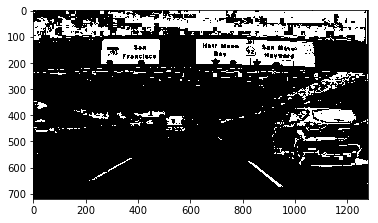

In [139]:
interact(show_hls_select, 
         image_nr = images_selections,
         channel = {"h": 0, "l": 1, "s": 2},
         minthresh=widgets.IntSlider(min=0,max=359,step=1,value=10),
         maxthresh=widgets.IntSlider(min=0,max=359,step=1,value=100));
